#### Hello !!
Dit notebook en een vliegende start in data-analyse en machinelearning.

1)Feature Selection

2)Model selection

3)Input validation

....

Voordat je begint moet je voor jezelf beantwoorden:
- Wat is diabetes?
- Hoe krijg je het?
- Zijn er verschillende soorten?
- Wat zijn de gevolgen?
- Hoe wordt het gediagnostiseerd?
- Hoe wordt het behandeld?



#### Antwoorden:

















####  Test voor benodigde modules. Heb je een foutmelding installeer dan met Pip de ontbrekende modules.

In [1]:
# Import nodige modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
plt.style.use('fivethirtyeight')


### Opdracht 1: 
Gebruik pandas (pd) om het bestand diabetes.csv in te lezen en toe te kennen aan variable genaamd diab. 

In [2]:
diab = pd.read_csv('diabetes.csv')

### Opdracht 2:
Check de data zijn alle records in de tabel juist.
Maak drie tests in python om te zien of de data correct is. 

TIP: het pandas object heeft hiervoor ook een aantal ingebouwde functies. (desscribe())

In [3]:
# test 1: nul waarden
diab[(diab == 0)].count()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [4]:
# test 2: nan waarden
diab[(diab == 'NaN')].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# test 3: telt alle unieke values
diab.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

### Opdracht 3:

Hoeveel gevallen van diabetes zijn er?
Is het volgens jouw een probleem dat er een verschil is tussen het aantal diabetes gevallen en geen diabetes?
Kan je een uitspraak doen over het aantal mannen?

Reken de waarden hieronder uit.


In [6]:
# telt alle waardes bij elkaar op waarvan de outcome 1 is
(diab['Outcome']== 1).sum()

268

### Een korte analyse.

Bekijk de onderstaande plots, valt er iets op? 

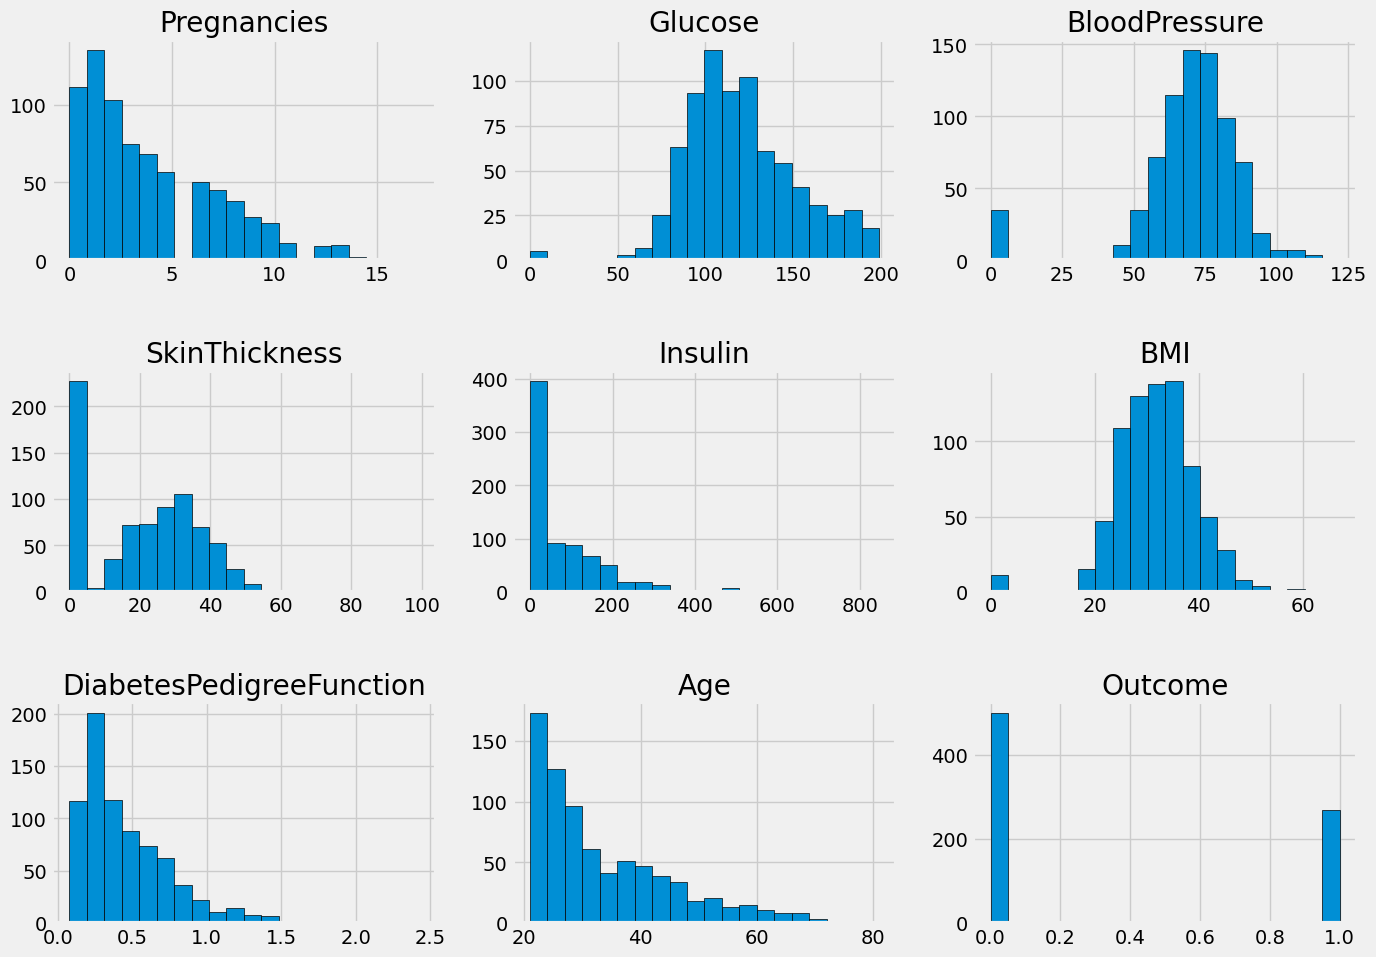

In [8]:
columns=diab.columns[:9]
plt.subplots(figsize=(15,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((int(length/2)),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

### Opdracht 4:
Wat valt er op?




Antwoord: Er valt op dat heel veel data 0 is of niet ingevuld. 

### Opdracht  5:

Doe de zelfde test maar selecteer nu alleen op de gevallen met diabetes. Is er een verschill met de plots waarin alle gevallen staan. Geef een motivatie? 

Bevatten sommige kolommen ongeldige waarden? Ja

Repareer de tabel zo dat er geen nul waarden instaan? 

Welke waarde zou je kiezen als vervanging van de nul waarden?


TIP: Maak eerst een tabel met alleen de diabetes gevallen en gebruik de onderstaande cellen. 

In [9]:
# data met alleen waardes van diabetes gevallen
data = diab[(diab['Outcome'] == 1)]

In [10]:
# vervang 0 and NaN waarden.

In [11]:
# haalt de lege data op
data[(data == 0)].count()

Pregnancies                  38
Glucose                       2
BloodPressure                16
SkinThickness                88
Insulin                     138
BMI                           2
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
# vervang de 0 waarders met nan en vervang daarna de nan waardes met het gemiddelde
diab['Glucose'].replace(0 ,np.nan, inplace=True)
diab['Glucose'] = diab['Glucose'].fillna(diab['Glucose'].mean())
diab['BloodPressure'].replace(0 ,np.nan, inplace=True)
diab['BloodPressure'] = diab['BloodPressure'].fillna(diab['BloodPressure'].mean())
diab['SkinThickness'].replace(0 ,np.nan, inplace=True)
diab['SkinThickness'] = diab['SkinThickness'].fillna(diab['SkinThickness'].mean())
diab['BMI'].replace(0 ,np.nan, inplace=True)
diab['BMI'] = diab['BMI'].fillna(diab['BMI'].mean())

In [13]:
diab[(diab == 0)].count()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

### Opdracht  6 

Hoe bepaal je in pandas de correlatie tussen twee of meerdere kolomen
Wat betekent het als er sprake is van een correlatie?



#### Met de methode corr() wordt de relatie tussen kolomen gecheckt. 
#### Als er sprake is van een perfecte correlatie tussen twee of meerdere kolomen wordt 1 aangegeven

### Opdracht 7:

Hoe maak je in SNS een heatmap, wat is een heatmap eigenlijk?
Maak een correlatie tabel in pandas en geef die weer in een heatmap

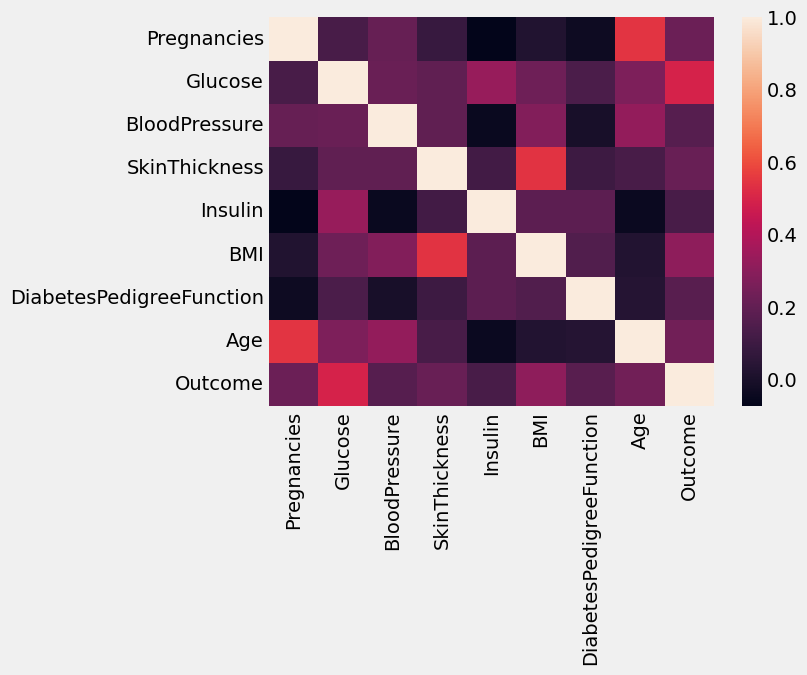

In [15]:
# Met een heatmap kunnen de resultaten van de correlaties gevisualiseerd worden
sns.heatmap(diab.corr())
plt.show()

### Laten we eens wat voorspellen!

Gevraagd bekijk van eenieder hier ondergenoemde classifier de mediawiki pagina. 
Welke denk je dat voor ons probleem het meeste geschikt is en waarom?


Wat zijn de verschillen tussen de clasifier?

Om welke reden zou je een bepaalde clasifier kiezen?
.
.
.
.




In [16]:
# Importeen aantal standaard systeem voor machine-learning gebruik pip om de ontbrekende modules te installeren.

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Opdracht 8:

Zoek uit wat er in het onderstaande blok gebeurt, geef hieronder de beschrijving:

.Outcome wordt opgeslagen in een variable
.De eerste 7 rijen van de dataset worden in een variable opgeslagen
.Er wordt een train en test variable gemaakt waarvan de test size 25% is

.X en Y worden allebei getraint en getest. Bij x worden de kolommen zonder outcome meegenomen en bij Y wordt alleen de outcome gebruikt.

In [17]:
# De code hieronder is absuluut noodzakelijk voor een ML training.

outcome=diab['Outcome']
data=diab[diab.columns[:8]]
train,test=train_test_split(diab,test_size=0.25,random_state=0,stratify=diab['Outcome'])# stratify the outcome
train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']

In [18]:
train_X.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
432,1,80.0,74.000000,11.00000,60,30.000000,0.527,22
453,2,119.0,72.405184,29.15342,0,19.600000,0.832,72
706,10,115.0,72.405184,29.15342,0,32.457464,0.261,30
606,1,181.0,78.000000,42.00000,293,40.000000,1.258,22
118,4,97.0,60.000000,23.00000,0,28.200000,0.443,22


In [19]:
train_Y.head(5)

432    0
453    0
706    1
606    1
118    0
Name: Outcome, dtype: int64

### Opdracht 9:

Wat zie je in de output van de bovenstaande cellen? (2 stuks)

Antwoord:

    De bovenste cel toont de feature matrix waarmee er getraind wordt.
    De onderstaande cel toont de target vector met de verwachte uitkomst er getraind.

### SVM (Zoek uit wat een SVM model is?) 

In [20]:
types=['rbf','linear']
for i in types:
    model=svm.SVC(kernel=i)
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    print('Accuracy for SVM kernel=',i,'is',metrics.accuracy_score(prediction,test_Y))

Accuracy for SVM kernel= rbf is 0.7604166666666666
Accuracy for SVM kernel= linear is 0.7552083333333334


### Logistic Regression (Wat is een Logistic Regression model?)

In [21]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_Y))

The accuracy of the Logistic Regression is 0.7708333333333334


### Opdracht  10:
Maak voor de decision tree classifier een getraind model en test de nauwkeurigheid.



In [22]:
model=DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy is',metrics.accuracy_score(prediction,test_Y))

The accuracy is 0.71875


### Alle systemen op een rijtje.


In [23]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    abc.append(metrics.accuracy_score(prediction,test_Y))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe

,Accuracy
Linear Svm,0.755208
Radial Svm,0.760417
Logistic Regression,0.770833
KNN,0.723958
Decision Tree,0.697917


De bovenstaande algoritmen geven geen erg hoge nauwkeurigheid. Dit kan worden verbeterd door attributeselectie te gebruiken en alleen relevante kolommen te gebruiken. We kunnen ook gebruik maken van ensembling of middeling van verschillende algoritmen. 

### Vraag ?
Wat is esembling?
Het combineren van meerdere modellen die resultaten voorspellen, om meer betere resultaten te krijgen.


### Opdracht 11

Om de nauwkeurigheid van een model te bepalen wordt ook wel gebruik 
gemaakt van een confusion matrix, maak voor een van de get bruikte modelen een confusion 
matrix en doe een uitspraak over de betrouwbaarheid van het model?



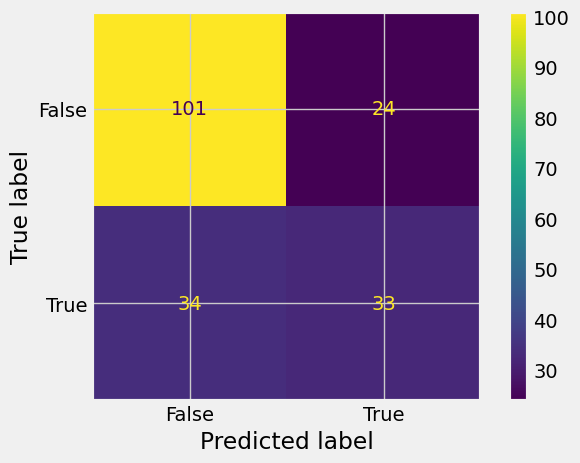

0.6979166666666666


In [24]:
#  Confusion matrix.
confusion_matrix = metrics.confusion_matrix(test_Y, prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

print(metrics.accuracy_score(prediction,test_Y))

## Feature Extraction/ Selection:

- Veel attributen beïnvloeden de nauwkeurigheid van het algoritme.

- Feature extractie betekent dat je alleen de belangrijkste attributen selecteert om de nauwkeurigheid te verbeteren. 

- Selectie van de belangrijkste attributen verkleint de kans op overfitting en versnelt de training.

- Je kan op twee manieren de belangrijkste attributen selecteren:
 - Via de correlatie matrix en dan de attributen met een lage onderlinge correlatie
 - Via een RandomforestClassifier deze geeft het belang van de attributen aan.



In [25]:
from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier(n_estimators=100,random_state=0)
X=diab[diab.columns[:8]]
Y=diab['Outcome']
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

Glucose                     0.253167
BMI                         0.160053
Age                         0.141006
DiabetesPedigreeFunction    0.122469
BloodPressure               0.089268
Pregnancies                 0.083054
SkinThickness               0.077361
Insulin                     0.073621
dtype: float64

### Gevraagd :Observations:

Wat betekenen de verschillende getallen in de velden. Ga nu terug naar je correlatie matrix en kies de 5 attributen met de laagste onderlinge correlatie en vergelijk deze met de top 5 van de RandomForestClassifier?


Verschil: Insuline heeft een hoger correlatie dan leeftijd. Insuline de laagste correlatie van bijna alles.

Overeenkomst: Er zijn hoge correlaties met glocuse



### Vraag wat zijn volgens jouw de belangrijkste features voor het bepalen van diabetes en geef aan waarop je dat baseert?

Antwoord:
    Glocuse en BMI gebasseerd op de heatmap en de modellen.


### Tot slot: 
Gezien de resultaten van de voorspellingen zou je een systeem van ML advisreen om disgnose te stellen of iemand diabetes heeft of niet


Antwoord: geef minimaal twee argumenten.
    Het is niet accuraat, omdat het maar gebasseerd is op een groep vrouwelijke indianen. 
    